# CODE BLOCKS TO GET BEST OPTIMIZATION ALGORITHM FOR OUR MODEL

<p>In this part we are trying  6 different optimization algorithm and the final summary is reported in CM3</p>

### DATASET PREPARATION

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from numpy.random import seed
# seed(0)
# tf.random.set_seed(0)

In [73]:
dataset = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True)
data_dict = np.array(dataset)

values = data_dict[()]['features']
labels = data_dict[()]['target']

features = []
for i in range(60000):
    features.append(values[i].flatten())
features = np.array(features)

final_features = pd.DataFrame(features)
final_features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


In [74]:
from sklearn.preprocessing import OneHotEncoder
labels = pd.DataFrame(labels, columns = ['output'])

categorical_cols = ['output']
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)
encoded_labels = encoder.fit_transform(labels[categorical_cols])

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, encoded_labels, test_size = 0.1, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## OPTIMIZATION ALGORITHM 2: RMSPROP

In [76]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 2, activation = 'relu', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(Dropout(drop_rate_1))

cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 4, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))


# second and third hidden layer
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))

In [77]:
# Compiling the model 
cnn.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [78]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
filepath = 'best_model_rmsp.wts.h5'

fitted_model = cnn.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

Epoch 1/100
81/81 [==============================] - 70s 861ms/step - loss: nan - accuracy: 0.1998 - val_loss: nan - val_accuracy: 0.2004

Epoch 00001: val_loss did not improve from inf
Epoch 2/100
81/81 [==============================] - 70s 860ms/step - loss: nan - accuracy: 0.2011 - val_loss: nan - val_accuracy: 0.2004

Epoch 00002: val_loss did not improve from inf
Epoch 3/100
81/81 [==============================] - 72s 887ms/step - loss: nan - accuracy: 0.1976 - val_loss: nan - val_accuracy: 0.2004

Epoch 00003: val_loss did not improve from inf
Epoch 4/100
81/81 [==============================] - 70s 868ms/step - loss: nan - accuracy: 0.2002 - val_loss: nan - val_accuracy: 0.2004

Epoch 00004: val_loss did not improve from inf
Epoch 5/100
81/81 [==============================] - 69s 851ms/step - loss: nan - accuracy: 0.1978 - val_loss: nan - val_accuracy: 0.2004

Epoch 00005: val_loss did not improve from inf
Epoch 00005: early stopping


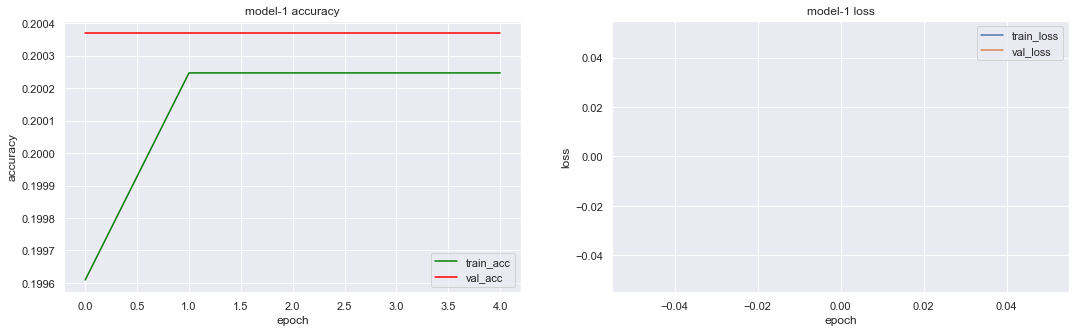

In [79]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model.history['loss'], label = 'train_loss')
plt.plot(fitted_model.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [80]:
print("Mean val acc:", np.mean(fitted_model.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model.history['loss']))

Mean val acc: 0.20037037134170532
Mean val loss: nan
Mean train acc: 0.20011934340000154
Mean train loss: nan


In [81]:
y_pred = cnn.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append(1)
            elif j == 1:
                true_values.append(2)
            elif j == 2:
                true_values.append(3)
            elif j == 3:
                true_values.append(4)
            elif j == 4:
                true_values.append(5)

result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append(1)
            elif j == 1:
                result.append(2)
            elif j == 2:
                result.append(3)
            elif j == 3:
                result.append(4)
            elif j == 4:
                result.append(5)

## OPTIMIZATION ALGORITHM 3: SGD

In [82]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn_2 = tf.keras.models.Sequential()
cnn_2.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 2, activation = 'relu', input_shape = [28,28,1]))
cnn_2.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn_2.add(tf.keras.layers.BatchNormalization())
cnn_2.add(Dropout(drop_rate_1))

cnn_2.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 4, activation = 'relu'))
cnn_2.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_2.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn_2.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))


# second and third hidden layer
cnn_2.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn_2.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn_2.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))

In [83]:
# Compiling the model 
cnn_2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [84]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
filepath = 'best_model_sgd.wts.h5'

fitted_model_2 = cnn_2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

Epoch 1/100
81/81 [==============================] - 71s 877ms/step - loss: 7.2440 - accuracy: 0.2006 - val_loss: 7.2883 - val_accuracy: 0.1983

Epoch 00001: val_loss improved from inf to 7.28834, saving model to best_model_sgd.wts.h5
Epoch 2/100
81/81 [==============================] - 70s 862ms/step - loss: 7.3162 - accuracy: 0.2023 - val_loss: 7.2258 - val_accuracy: 0.1983

Epoch 00002: val_loss improved from 7.28834 to 7.22577, saving model to best_model_sgd.wts.h5
Epoch 3/100
81/81 [==============================] - 71s 878ms/step - loss: 7.2032 - accuracy: 0.2019 - val_loss: 7.1922 - val_accuracy: 0.1983

Epoch 00003: val_loss improved from 7.22577 to 7.19218, saving model to best_model_sgd.wts.h5
Epoch 4/100
81/81 [==============================] - 70s 867ms/step - loss: 7.1917 - accuracy: 0.2000 - val_loss: 7.1700 - val_accuracy: 0.1983

Epoch 00004: val_loss improved from 7.19218 to 7.16999, saving model to best_model_sgd.wts.h5
Epoch 5/100
81/81 [=============================

81/81 [==============================] - 64s 797ms/step - loss: 7.0412 - accuracy: 0.3024 - val_loss: 7.0725 - val_accuracy: 0.3022

Epoch 00069: val_loss improved from 7.07262 to 7.07251, saving model to best_model_sgd.wts.h5
Epoch 70/100
81/81 [==============================] - 64s 791ms/step - loss: 7.1161 - accuracy: 0.3009 - val_loss: 7.0724 - val_accuracy: 0.3006

Epoch 00070: val_loss improved from 7.07251 to 7.07239, saving model to best_model_sgd.wts.h5
Epoch 71/100
81/81 [==============================] - 64s 790ms/step - loss: 7.0647 - accuracy: 0.3058 - val_loss: 7.0723 - val_accuracy: 0.2991

Epoch 00071: val_loss improved from 7.07239 to 7.07228, saving model to best_model_sgd.wts.h5
Epoch 72/100
81/81 [==============================] - 64s 787ms/step - loss: 7.1014 - accuracy: 0.2985 - val_loss: 7.0722 - val_accuracy: 0.2978

Epoch 00072: val_loss improved from 7.07228 to 7.07215, saving model to best_model_sgd.wts.h5
Epoch 73/100
81/81 [==============================] -

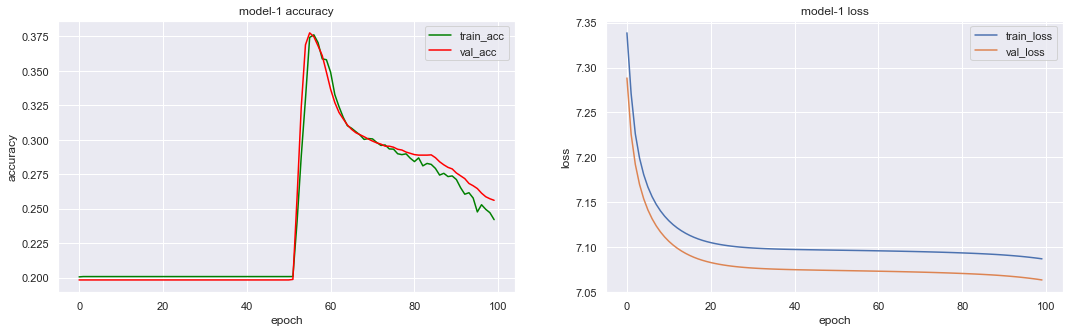

In [85]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_2.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_2.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_2.history['loss'], label = 'train_loss')
plt.plot(fitted_model_2.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [86]:
print("Mean val acc:", np.mean(fitted_model_2.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_2.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_2.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_2.history['loss']))

Mean val acc: 0.24681852146983146
Mean val loss: 7.084296741485596
Mean train acc: 0.24570617482066154
Mean train loss: 7.107755699157715


In [87]:
y_pred = cnn_2.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append(1)
            elif j == 1:
                true_values.append(2)
            elif j == 2:
                true_values.append(3)
            elif j == 3:
                true_values.append(4)
            elif j == 4:
                true_values.append(5)

result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append(1)
            elif j == 1:
                result.append(2)
            elif j == 2:
                result.append(3)
            elif j == 3:
                result.append(4)
            elif j == 4:
                result.append(5)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
score =accuracy_score(true_values, result) 
print(f'The test set accuracy obtained: {score*100} %')

The test set accuracy obtained: 25.3 %


<P>Final comparison of results and run time performance are reported in a tabular form in CM6</P>